In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import ticker
import pathlib

In [2]:
import matplotlib

font = {'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
## Two options:
## 'balance': same number of training events for signal and bkg
## 'bkgskew' uses 4 mln events of bkg, 500k of signal
dataset_type = 'balance'

## Self-explanatory
save_plots = True

In [4]:
if dataset_type not in ['balance', 'bkgskew']:
    raise ValueError

In [5]:
## Create plots directory, if missing
plot_directory = (str(pathlib.Path.home())
                  + '/classifier-studies/'
                  + 'plots/'
                  + 'exploratory_feature_analysis/'
)
pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

# Read training data from HDF5 file
Testing data is randomly sampled from training, no need to repeat the anaylisis with weaker statistics.

In [6]:
input_dir = './data/'
input_train = input_dir + 'train_dataset_' +  dataset_type + '.h5'
input_test = input_dir + 'test_dataset_' +  dataset_type + '.h5'

In [7]:
df_train = pd.read_hdf(input_train, 'LHCb_Train')
df_train

,p_PT,p_PZ,DTF_FixJPsi_p_PT,DTF_FixJPsi_p_PZ,DTF_FixJPsiLambda_p_PT,DTF_FixJPsiLambda_p_PZ,pim_PT,pim_PZ,DTF_FixJPsi_pim_PT,DTF_FixJPsi_pim_PZ,...,L_VFASPF_CHI2_VDOF,Lb_VFASPF_CHI2_VDOF,L_BPVIPCHI2,Lb_BPVIPCHI2,L_BPVVDCHI2,Lb_BPVVDCHI2,DTF_FixJPsi_status,DTF_FixJPsiLambda_status,TYPE,DTF_FixJPsiLambda_Lb_M
0,2391.007324,53119.367188,3109.104248,55021.527344,2674.173096,50463.800781,989.212524,9728.215820,395.459991,9636.396484,...,1.999228,2.617834,7.783529,0.275361,9.396670e+02,43.821186,0.0,0.0,1,5642.995117
1,665.045532,33222.363281,858.999207,33044.460938,918.579163,35519.261719,264.080444,4548.199707,58.953770,4661.238281,...,3.834748,0.764857,2.052681,3.653825,1.111560e+04,43.061302,0.0,1.0,1,5725.535645
2,4809.560059,69587.210938,2526.715576,35863.093750,2477.713379,35118.335938,715.287170,8111.864746,718.622498,8492.106445,...,1.598892,4.070712,7.986773,15.390973,1.534330e+05,236.864914,0.0,0.0,1,5649.050781
3,787.348022,13282.785156,1318.262573,21621.804688,1366.567871,22419.171875,181.239487,4025.402100,139.180206,4125.206055,...,0.835794,0.104946,0.137557,1.657936,1.895357e+04,3631.897705,0.0,0.0,1,5532.559570
4,2990.258789,42095.085938,2862.283447,39731.078125,2839.418701,39281.101562,662.368652,9727.785156,620.543213,9689.310547,...,1.805324,0.836892,2.284361,1.377249,3.258634e+06,1370.535400,0.0,0.0,1,5886.123047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145293,805.121277,23507.595703,814.090576,23055.335938,1359.963013,37917.859375,552.082092,24046.093750,506.498505,22791.193359,...,95.045044,1.236983,3.500154,66.592827,8.296238e+06,1136.414185,0.0,1.0,0,4926.012695
145294,653.301514,19669.052734,403.274017,18379.828125,336.683594,16323.865234,360.564453,8928.512695,84.689331,8790.658203,...,1.846003,25.181692,72.114159,22.795586,1.628411e+04,427.659424,0.0,0.0,0,4932.150391
145295,645.209595,13305.105469,432.491089,10379.948242,243.679337,6748.758301,239.370438,3528.149170,305.574707,4204.743652,...,38.324047,24.636105,67.084892,28.038248,3.932625e+06,120.323692,0.0,1.0,0,6270.460449
145296,815.101501,18208.404297,731.964661,16345.332031,2177.278320,49956.578125,120.630455,2712.889404,119.802505,2716.831787,...,0.025877,1.267947,0.395967,13.967916,1.833557e+05,288.725372,0.0,0.0,0,6501.849121


In [8]:
df_signal = df_train[df_train['TYPE'] == 1]
df_bkg = df_train[df_train['TYPE'] == 0]

del(df_train)

# Invariant mass distribution

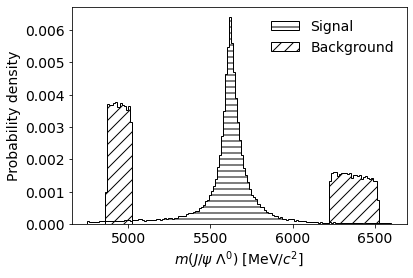

In [9]:
xrange=(4750,6600)
binning=150

plt.hist(df_signal['DTF_FixJPsiLambda_Lb_M'],
         bins=binning,
         range=xrange,
         label='Signal',
         density=True,
         histtype='stepfilled',
         edgecolor='black',
         fc='none',#mcolors.to_rgba('dimgrey', alpha=0.4),
         hatch='--'
)

plt.hist(df_bkg['DTF_FixJPsiLambda_Lb_M'],
         bins=binning,
         range=xrange,
         label='Background',
         density=True,
         histtype='stepfilled',
         edgecolor='black',
         fc='none',#mcolors.to_rgba('gainsboro', alpha=0.5),
         hatch='//'
)
#plt.grid()
plt.xlabel("$m(J/\psi~\Lambda^0)$ [MeV/$c^2$]")
#plt.title("Training data $\Lambda_b$ invariant mass\n (DTF w/ $J/\psi$ & $\Lambda$ mass constraint)")
plt.legend(frameon=False)
#plt.yscale('log')
plt.ylabel("Probability density")
if save_plots:
    plt.savefig(plot_directory + 'sig_bkg_distribution_' + dataset_type + '.pdf', bbox_inches='tight')
plt.show()

# Correlation matrices

In [10]:
features = [
    'p_PT',
    'p_PZ',
    'DTF_FixJPsi_p_PT',
    'DTF_FixJPsi_p_PZ',
    'DTF_FixJPsiLambda_p_PT',
    'DTF_FixJPsiLambda_p_PZ',
    'pim_PT',
    'pim_PZ',
    'DTF_FixJPsi_pim_PT',
    'DTF_FixJPsi_pim_PZ',
    'DTF_FixJPsiLambda_pim_PT',
    'DTF_FixJPsiLambda_pim_PZ',
    'Jpsi_PT',
    'Jpsi_PZ',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'L_BPVDIRA',
    'Lb_BPVDIRA',
    'L_VFASPF_CHI2_VDOF',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVIPCHI2',
    'Lb_BPVIPCHI2',
    'L_BPVVDCHI2',
    'Lb_BPVVDCHI2',
    'DTF_FixJPsi_status',
    'DTF_FixJPsiLambda_status'
]

In [11]:
feature_labels = {
    'p_PT': '$p_T(p)$',
    'DTF_FixJPsi_p_PT': '$p_T^{DTF}(p)$',
    'DTF_FixJPsiLambda_p_PT': '$p_T^{DTF}(p)$ ($\Lambda$ m.c.)',
    'p_PZ': '$p_z(p)$',
    'DTF_FixJPsi_p_PZ': '$p_z^{DTF}(p)$',
    'DTF_FixJPsiLambda_p_PZ': '$p_z^{DTF}(p)$ ($\Lambda$ m.c.)',
    'pim_PT': '$p_T(\pi)$',
    'DTF_FixJPsi_pim_PT': '$p_T^{DTF}(\pi)$',
    'DTF_FixJPsiLambda_pim_PT': '$p_T^{DTF}(\pi)$ ($\Lambda$ m.c.)',
    'pim_PZ': '$p_z(\pi)$',
    'DTF_FixJPsi_pim_PZ': '$p_z^{DTF}(\pi)$',
    'DTF_FixJPsiLambda_pim_PZ': '$p_Z^{DTF}(\pi)$ ($\Lambda$ m.c.)',
    'Jpsi_PT': '$p_T(J/\psi)$',
    'Jpsi_PZ': '$p_z(J/\psi)$',
    'L_ENDVERTEX_X': '$x_{vtx}^\Lambda$',
    'L_ENDVERTEX_Y': '$y_{vtx}^\Lambda$',
    'L_ENDVERTEX_Z': '$z_{vtx}^\Lambda$',
    'L_BPVDIRA': '$\Lambda$ DIRA',
    'Lb_BPVDIRA': '$\Lambda_b$ DIRA',
    'L_VFASPF_CHI2_VDOF': '$\chi^2_{vtx}(\Lambda)$',
    'Lb_VFASPF_CHI2_VDOF': '$\chi^2_{vtx}(\Lambda_b)$',
    'L_BPVIPCHI2': '$\Lambda$ IPCHI2',
    'Lb_BPVIPCHI2': '$\Lambda_b$ IPCHI2',
    'L_BPVVDCHI2': '$\Lambda$ VDCHI2',
    'Lb_BPVVDCHI2': '$\Lambda_b$ VDCHI2',
    'DTF_FixJPsi_status': 'DTF convergence ($J/\psi$ m.c.)',
    'DTF_FixJPsiLambda_status': 'DTF convergence ($J/\psi~\Lambda$ m.c.)'
}

## Signal events

In [12]:
MC_covDF = df_signal[features].corr()

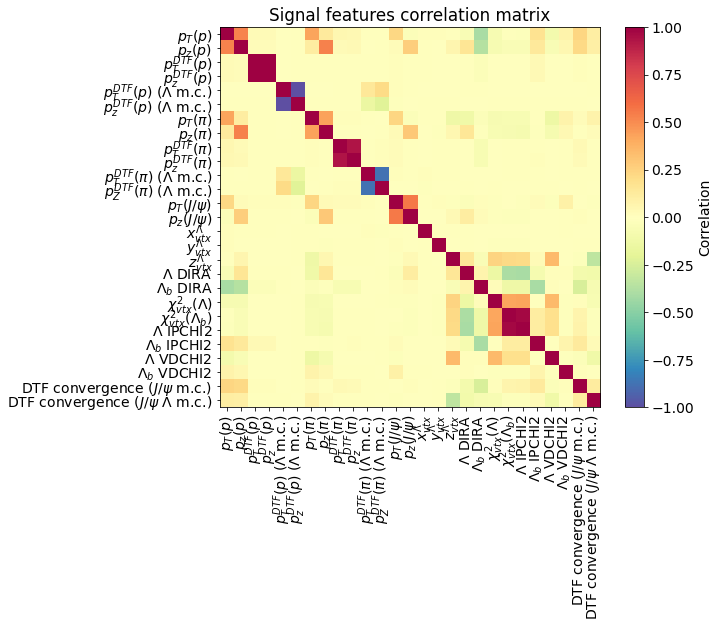

In [13]:
plt.figure(figsize=(9,7))
plt.matshow(MC_covDF, cmap='Spectral_r',fignum=0) ## Fignum=0 plots on current figure (matshow creates a new one by default)
plt.clim(-1,1)
plt.colorbar(label='Correlation')
plt.title("Signal features correlation matrix")
ax = plt.gca() 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.set_xticklabels([feature_labels[feature] for feature in features], rotation='vertical')
ax.set_yticklabels([feature_labels[feature] for feature in features])
plt.show()

Very high correlation between `Lb_VFASPF_CHI2_VDOF` and `L_BPVIPCHI2`. Significant correlation between daughter particles VF momenta, both between $p_T$ and $p_z$ (reasonable) and amongst themselves (expected for a pure signal sample).

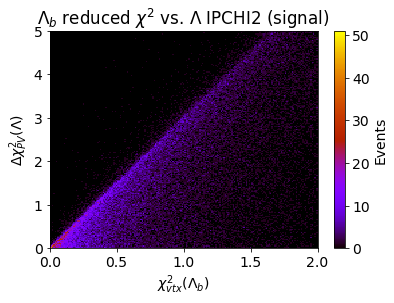

In [14]:
plt.hist2d(df_signal['Lb_VFASPF_CHI2_VDOF'],
           df_signal['L_BPVIPCHI2'],
           bins=200, cmap='gnuplot', range=[[0,2],[0,5]])
plt.title("$\Lambda_b$ reduced $\chi^2$ vs. $\Lambda$ IPCHI2 (signal)")
plt.xlabel("$\chi^2_{vtx}(\Lambda_b)$")
plt.ylabel("$\Delta\chi^2_{PV} (\Lambda)$")
plt.colorbar(label='Events')
plt.show()

Results on DTF variables are not as realiable because there are no cuts applied, therefore some outrageously bad values can (and do) screw with the correlation algorithm. For instance:

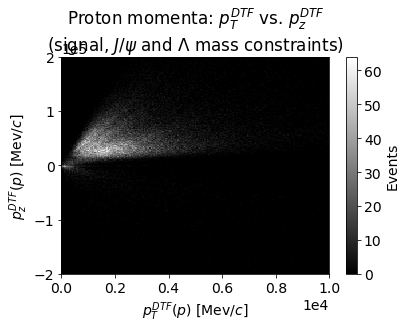

In [15]:
plt.hist2d(df_signal['DTF_FixJPsiLambda_p_PT'], df_signal['DTF_FixJPsiLambda_p_PZ'],
           bins=200, cmap='gray', range=[[0,1e4],[-2e5,2e5]])
plt.title("Proton momenta: $p_T^{DTF}$ vs. $p_z^{DTF}$\n(signal, $J/\psi$ and $\Lambda$ mass constraints)")
plt.xlabel("$p_T^{DTF}(p)$ [Mev/$c$]")
plt.ylabel("$p_z^{DTF}(p)$ [Mev/$c$]")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

Events are obviously correlated, but the algorithm is tricked by the small number of events in the lower region and thinks there is a heavy anti-correlation.

## Background events

In [16]:
SB_covDF = df_bkg[features].corr()

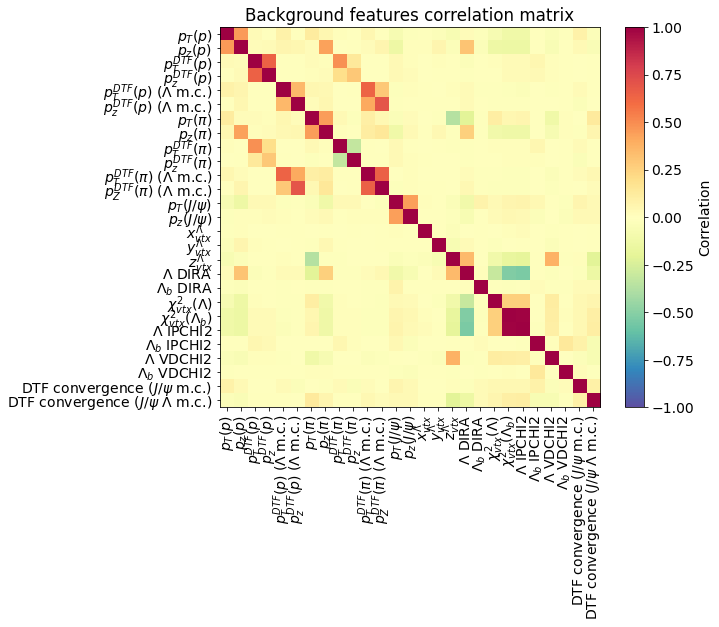

In [17]:
plt.figure(figsize=(9,7))
plt.matshow(SB_covDF, cmap='Spectral_r',fignum=0) ## Fignum=0 plots on current figure (matshow creates a new one by default)
plt.clim(-1,1)
plt.colorbar(label='Correlation')
plt.title("Background features correlation matrix")
ax = plt.gca() 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.set_xticklabels([feature_labels[feature] for feature in features], rotation='vertical')
ax.set_yticklabels([feature_labels[feature] for feature in features])
plt.show()

Generally less correlation between variables, in particular VF transverse/longitudinal momenta of the same particles. Slight anti-correlation between $\Lambda_b$ $\chi^2$ and $\Lambda$ pointing angle.

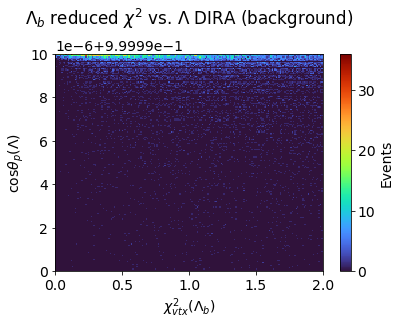

In [18]:
plt.hist2d(df_bkg['Lb_VFASPF_CHI2_VDOF'], df_bkg['L_BPVDIRA'],
           bins=200, cmap='turbo', range=[[0,2],[0.99999,1]])
plt.title("$\Lambda_b$ reduced $\chi^2$ vs. $\Lambda$ DIRA (background)\n")
plt.xlabel("$\chi^2_{vtx}(\Lambda_b)$")
plt.ylabel(r"$\cos\theta_p (\Lambda)$")
plt.colorbar(label='Events')
plt.show()

# Feature comparison (signal vs. bkg)

In [19]:
features_to_plot = [
    'DTF_FixJPsi_p_PT',
    'DTF_FixJPsi_p_PZ',
    'DTF_FixJPsi_pim_PT',
    'DTF_FixJPsi_pim_PZ',
    'Jpsi_PT',
    'Jpsi_PZ',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'L_BPVDIRA',
    'Lb_BPVDIRA',
    'L_VFASPF_CHI2_VDOF',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVIPCHI2',
    'Lb_BPVIPCHI2',
    'L_BPVVDCHI2',
    'Lb_BPVVDCHI2',
]

In [20]:
feature_ranges = {
    'DTF_FixJPsi_p_PT': (0,10000),
    'DTF_FixJPsi_p_PZ': (0,150000),
    'DTF_FixJPsi_pim_PT': (0,2000),
    'DTF_FixJPsi_pim_PZ': (0,25000),
    'Jpsi_PT': (0,20000),
    'Jpsi_PZ': (0,200000),
    'L_ENDVERTEX_X': (-1000,1000),
    'L_ENDVERTEX_Y': (-1000,1000),
    'L_ENDVERTEX_Z': (5500, 8500),
    'L_BPVDIRA': (0.99999,1),
    'Lb_BPVDIRA': (0.9999,1),
    'L_VFASPF_CHI2_VDOF': (0,1),
    'Lb_VFASPF_CHI2_VDOF': (0,20),
    'L_BPVIPCHI2': (0,25),
    'Lb_BPVIPCHI2': (0,25),
    'L_BPVVDCHI2': (0,15000),
    'Lb_BPVVDCHI2': (0,300),
}

In [21]:
mevc = r'MeV/$c$'

In [22]:
feature_labels_with_units = {
    'DTF_FixJPsi_p_PT': f'$p_\mathrm{{T}}^\mathrm{{DTF}}(p)$ [{mevc}]',
    'DTF_FixJPsi_p_PZ': f'$p_z^\mathrm{{DTF}}(p)$ [{mevc}]',
    'DTF_FixJPsi_pim_PT': f'$p_\mathrm{{T}}^\mathrm{{DTF}}(\pi^-)$ [{mevc}]',
    'DTF_FixJPsi_pim_PZ': f'$p_z^\mathrm{{DTF}}(\pi^-)$ [{mevc}]',
    'Jpsi_PT': f'$p_\mathrm{{T}}(J/\psi)$ [{mevc}]',
    'Jpsi_PZ': f'$p_z(J/\psi)$ [{mevc}]',
    'L_ENDVERTEX_X': f'$x_\mathrm{{vtx}}^\Lambda$ [mm]',
    'L_ENDVERTEX_Y': f'$y_\mathrm{{vtx}}^\Lambda$ [mm]',
    'L_ENDVERTEX_Z': f'$z_\mathrm{{vtx}}^\Lambda$ [mm]',
    'L_BPVDIRA': fr'$\cos\xi_p (\Lambda^0)$',
    'Lb_BPVDIRA': fr'$\cos\xi_p (\Lambda^0_b)$',
    'L_VFASPF_CHI2_VDOF': fr'$\tilde{{\chi}}^2_\mathrm{{vtx}}(\Lambda^0)$',
    'Lb_VFASPF_CHI2_VDOF': fr'$\tilde{{\chi}}^2_\mathrm{{vtx}}(\Lambda^0_b)$',
    'L_BPVIPCHI2': f'$\Delta\chi^2_\mathrm{{PV}} (\Lambda^0)$',
    'Lb_BPVIPCHI2': f'$\Delta\chi^2_\mathrm{{PV}} (\Lambda^0_b)$',
    'L_BPVVDCHI2': fr'$\chi^2_\mathrm{{dist}} (\Lambda^0)$',
    'Lb_BPVVDCHI2': fr'$\chi^2_\mathrm{{dist}} (\Lambda^0_b)$',
    'DTF_FixJPsi_status': f'DTF convergence ($J/\psi$ m.c.)',
    'DTF_FixJPsiLambda_status': f'DTF convergence ($J/\psi~\Lambda^0$ m.c.)'
}

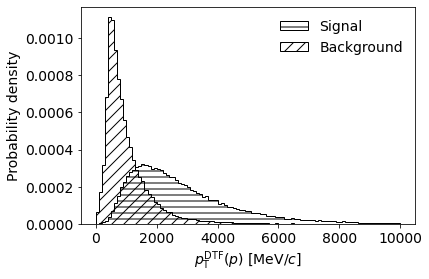

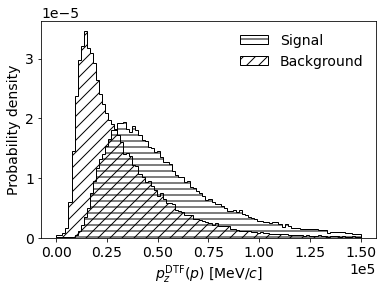

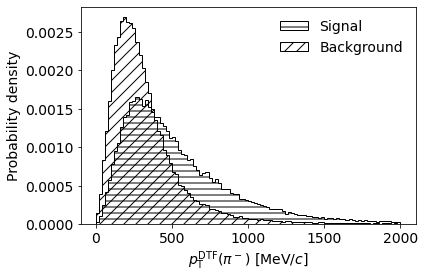

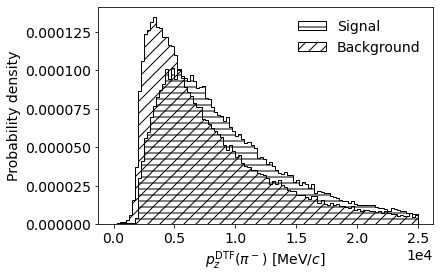

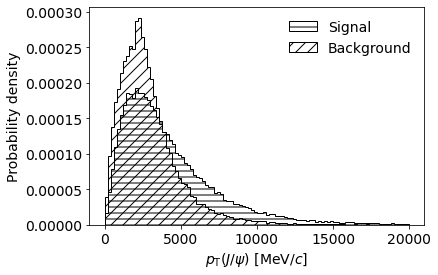

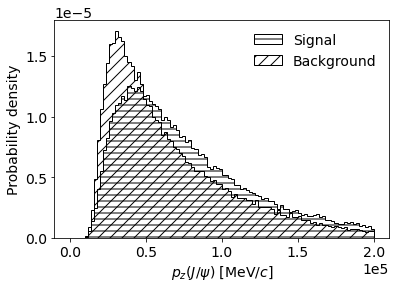

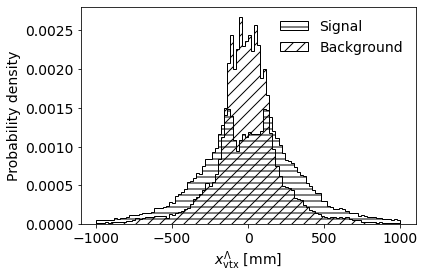

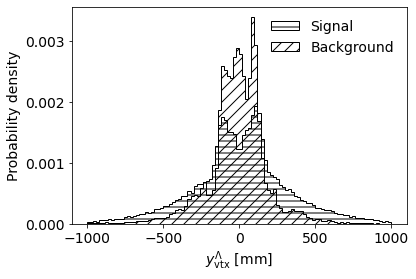

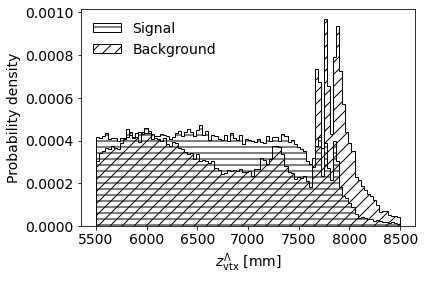

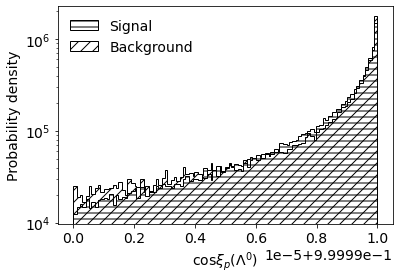

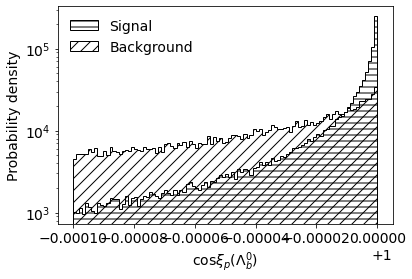

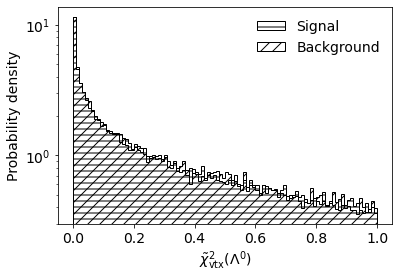

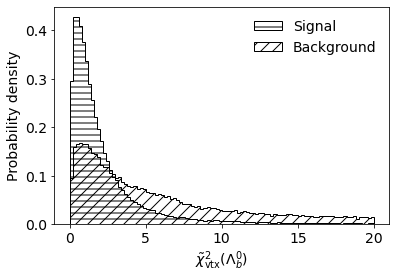

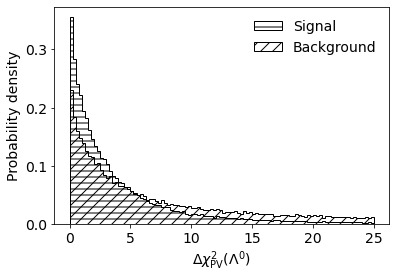

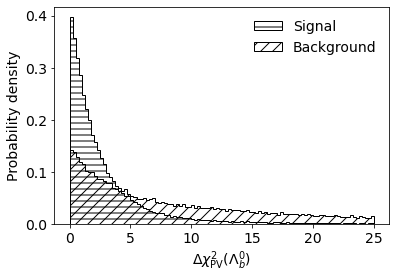

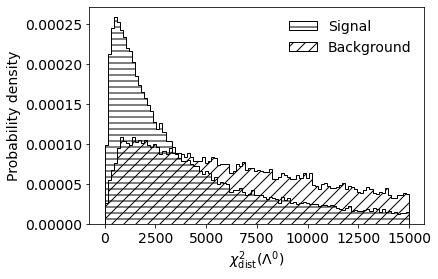

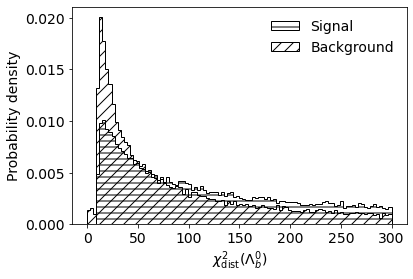

In [23]:
bins_features = 100

for feature in features_to_plot:
    plt.hist(
        df_signal[feature],
        bins=bins_features,
        range=feature_ranges[feature],
        label='Signal',
        density=True,
        histtype='stepfilled',
        edgecolor='black',
        fc='none',
        hatch='--'
    )
    
    plt.hist(
        df_bkg[feature],
        bins=bins_features,
        range=feature_ranges[feature],
        label='Background',
        density=True,
        histtype='stepfilled',
        edgecolor='black',
        fc='none',
        hatch='//'
    )
    
    legend_loc = 'best'
    
    if (feature.endswith("DIRA")) | (feature == 'L_VFASPF_CHI2_VDOF'):
        plt.yscale('log')
        
    if (feature.endswith("DIRA")) | (feature == 'L_ENDVERTEX_Z'):
        legend_loc = 'upper left'
        
    if feature.endswith("PZ"):
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    plt.xlabel(feature_labels_with_units[feature])
    plt.ylabel("Probability density")
    plt.legend(frameon=False, loc=legend_loc)
    
    plt.show()

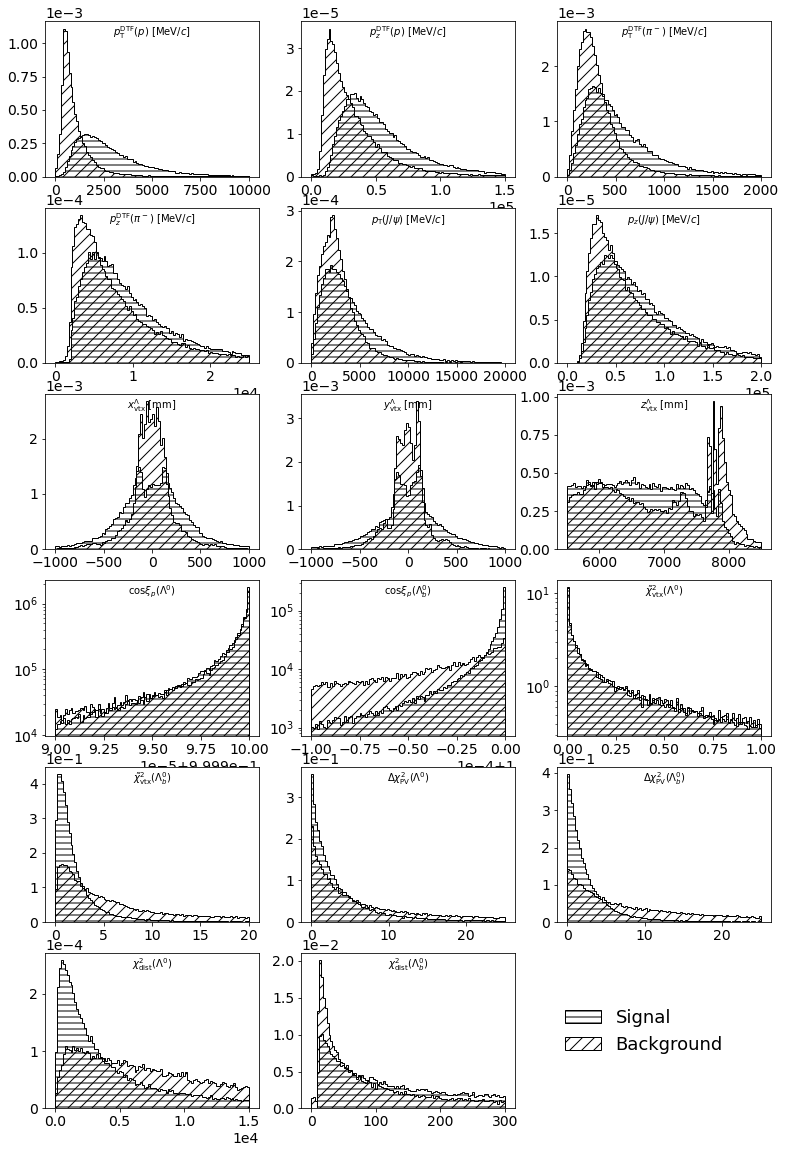

In [24]:
bins_features = 100

fig = plt.figure(figsize=(13,20))

for feature, i in zip(features_to_plot, range(len(features_to_plot))):
    
    plt.subplot(6, 3, i+1)
    
    plt.hist(
        df_signal[feature],
        bins=bins_features,
        range=feature_ranges[feature],
        label='Signal',
        density=True,
        histtype='stepfilled',
        edgecolor='black',
        fc='none',
        hatch='--'
    )
    
    plt.hist(
        df_bkg[feature],
        bins=bins_features,
        range=feature_ranges[feature],
        label='Background',
        density=True,
        histtype='stepfilled',
        edgecolor='black',
        fc='none',
        hatch='//'
    )
    
    
    legend_loc = 'best'
    
    if (feature.endswith("DIRA")) | (feature == 'L_VFASPF_CHI2_VDOF'):
        plt.yscale('log')
    else:
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    if (feature.endswith("DIRA")) | (feature == 'L_ENDVERTEX_Z'):
        legend_loc = 'upper left'
        
    if (feature.endswith("PZ")) | (feature.endswith("DIRA")) | (feature == 'L_BPVVDCHI2'):
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    #plt.xlabel(feature_labels_with_units[feature])
    plt.title(feature_labels_with_units[feature], fontsize=10, y=1.0, pad=-15)
    
    #plt.ylabel("Probability density")
    #plt.legend(frameon=False, loc=legend_loc)

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc=(.71,.09), frameon=False, fontsize=18)
if save_plots:
    plt.savefig(plot_directory + 'feature_distributions_' + dataset_type + '.pdf', bbox_inches='tight')
plt.show()